# Data Preprocessing
This notebook processes the Wine Quality dataset from UCI Machine Learning Repository.

In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Load data

In [168]:
red_wine = pd.read_csv("../data/raw/winequality-red.csv", sep=";")
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [169]:
red_wine.shape

(1599, 12)

In [170]:
white_wine = pd.read_csv("../data/raw/winequality-white.csv", sep=";")
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [171]:
white_wine.shape

(4898, 12)

### Merge datasets
Since the files for red and white wine have the same features, we can merge the files together and use a binary indicator variable to indicate the wine colour.

In [172]:
red_wine["is_red_wine"] = 1
white_wine["is_red_wine"] = 0

In [173]:
wine = pd.concat([red_wine, white_wine], ignore_index=True)
wine.insert(0, "is_red_wine", wine.pop("is_red_wine"))
wine

,is_red_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,0,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,0,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,0,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Inspect data

We check the type of variables for each column

In [174]:
wine.info()

<class 'pandas.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   is_red_wine           6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


The information above shows that there are no null values in this dataset, since the number of non-null values matches with the number of rows. We can verify this by running `.isnull().sum()`

In [175]:
wine.isnull().sum()

is_red_wine             0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We now check for duplicates and remove them if they exist.

In [176]:
int(wine.duplicated().sum())

1177

In [177]:
wine.drop_duplicates(inplace=True)
wine = wine.reset_index(drop=True)

In [178]:
wine.shape

(5320, 13)

We now check for the distribution for the wine quality.

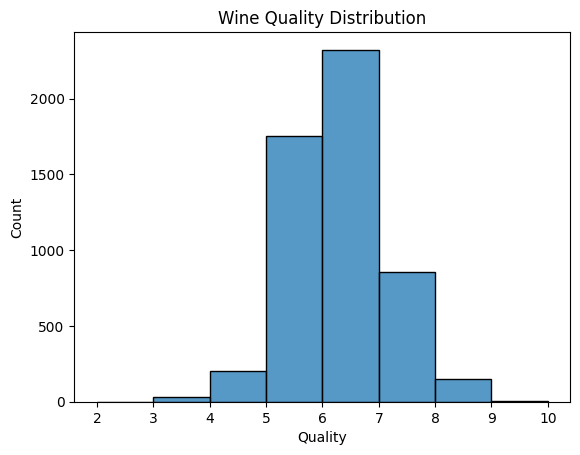

In [179]:
sns.histplot(wine['quality'], bins=range(2,11))
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Wine Quality Distribution')
plt.show()

In [180]:
pd.crosstab(wine["is_red_wine"], wine["quality"])

quality,3,4,5,6,7,8,9
is_red_wine,,,,,,,
0,20,153,1175,1788,689,131,5
1,10,53,577,535,167,17,0


Most wine have a quality between 5 and 7. Although the original publisher of the dataset defines wine with quality of 5-7 to be normal, in this project we want to classify wine as either "Poor" or "Good". Therefore we need to find a good threshold to split the dataset.

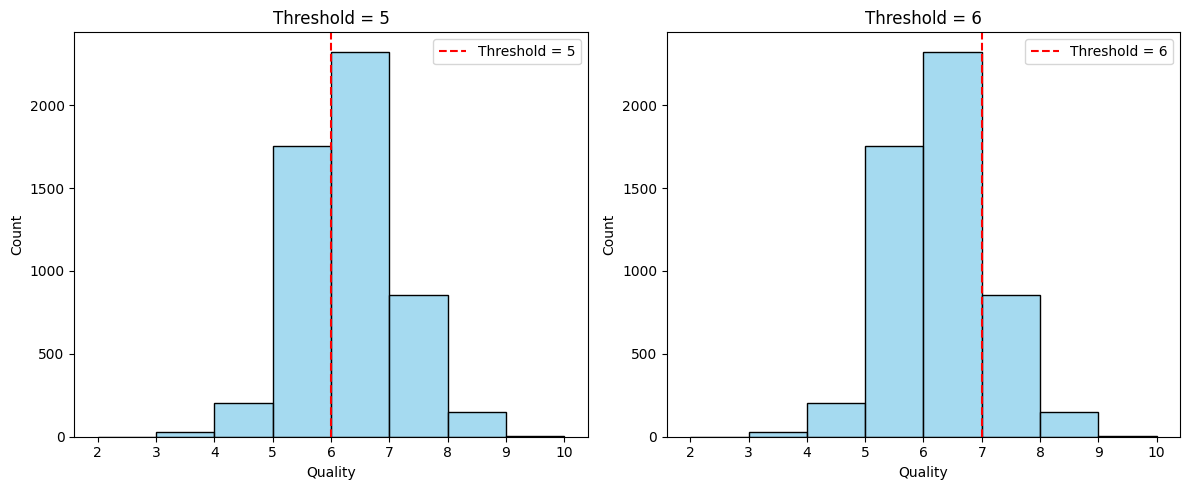

In [181]:
plt.figure(figsize=(12,5)) 
for i, t in enumerate([5,6], 1): 
    plt.subplot(1,2,i) 
    sns.histplot(wine['quality'], bins=range(2,11), kde=False, color='skyblue', edgecolor='black') 
    plt.axvline(t+1, color='red', linestyle='--', label=f'Threshold = {t}') 
    plt.xlabel('Quality') 
    plt.ylabel('Count') 
    plt.title(f'Threshold = {t}') 
    plt.legend() 
    
plt.tight_layout() 
plt.show()

In [182]:
len(wine[wine["quality"] <= 5])

1988

In [183]:
len(wine[wine["quality"] > 5])

3332

In [184]:
len(wine[wine["quality"] <= 6])

4311

In [185]:
len(wine[wine["quality"] > 6])

1009

Setting the threshold = 5 gives a better balance in the two categories. While it is not perfectly balanced, it is not severe and therefore doesn't need resampling.

### Feature selection

In [186]:
wine["quality_label"] = wine["quality"].apply(lambda x: 0 if x <= 5 else 1)
wine = wine.drop(columns="quality")

In [187]:
correlation_matrix = wine.corr()

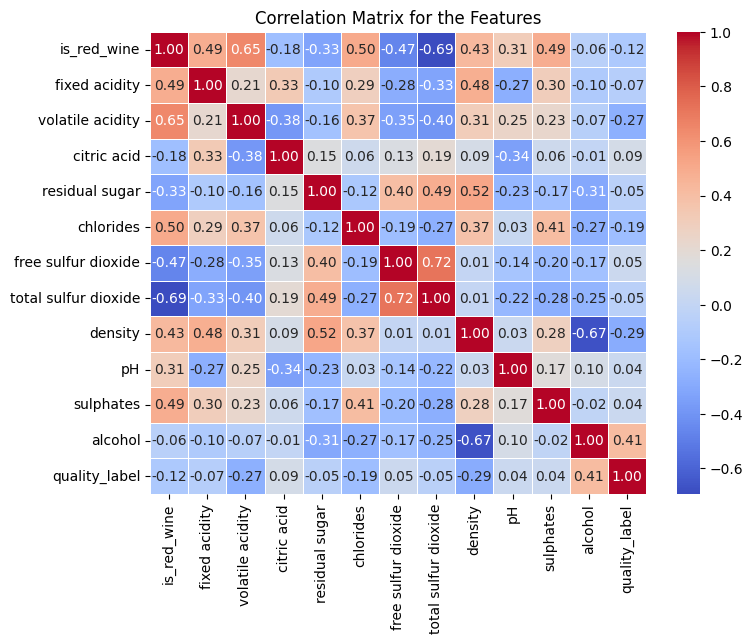

In [188]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for the Features')
plt.show()

The features that have the highest correlation with `quality_label` are `alcohol`(0.41), `density`(-0.29), `volatile acidity`(-0.27), and `chlorides`(-0.19). Additionally, `is_red_wine` is included as a categorical feature to account for structural differences between red and white wines.

While `alcohol` and `density` showed strong inverse correlation (-0.67), they represent chemically distinct properties of wine. Therefore, despite their inter-correlation, both variables are retained to preserve potentially complementary predictive information. Multicollinearity will be monitored during model evaluation to ensure it does not adversely affect performance.

### Data transformation

We check the distribution of the features to see if they need to be transformed.

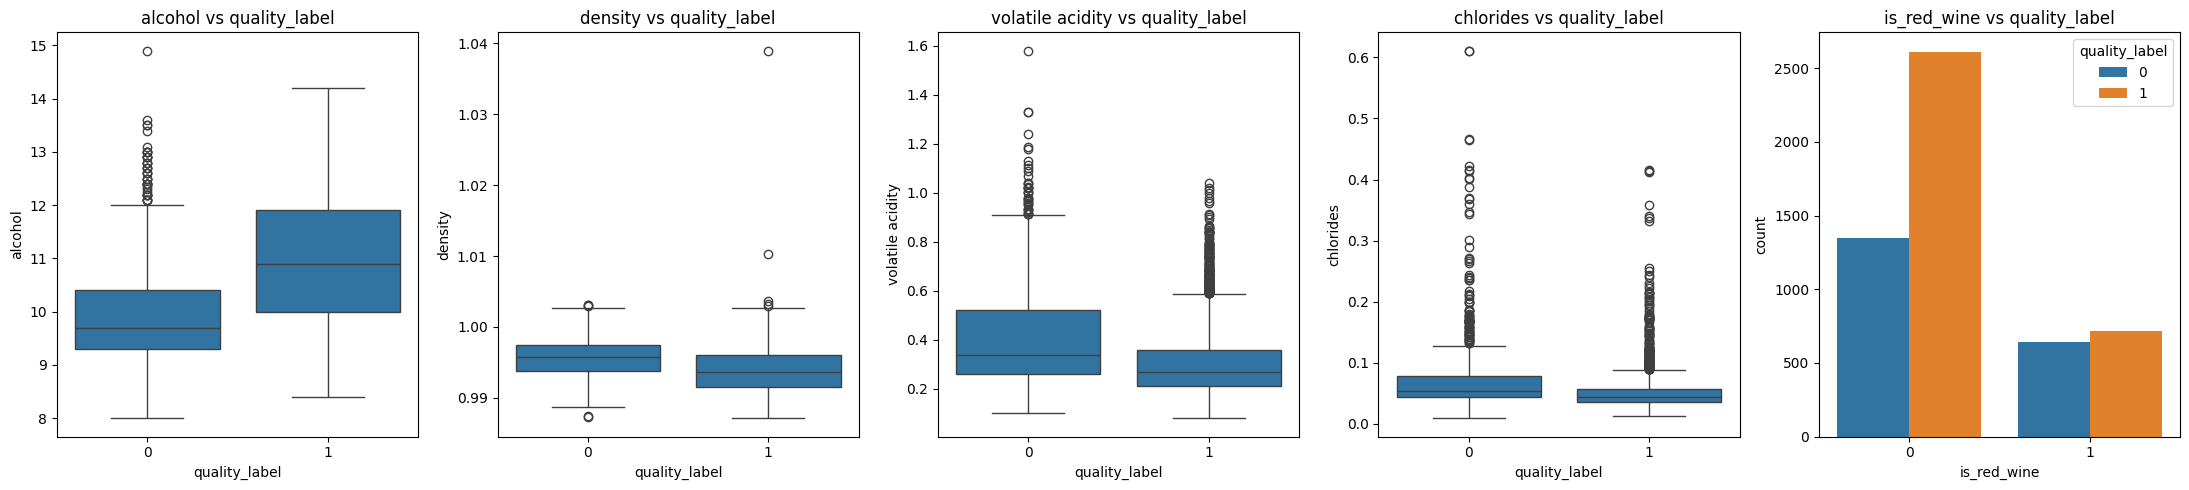

In [189]:
num_features = ['alcohol', 'density', 'volatile acidity', 'chlorides']
cat_feature = 'is_red_wine'
target = 'quality_label'

fig, axes = plt.subplots(1, 5, figsize=(22, 5))

for i, feature in enumerate(num_features):
    sns.boxplot(
        x=target,
        y=feature,
        data=wine,
        ax=axes[i],
        # palette="Set2"
    )
    axes[i].set_title(f'{feature} vs {target}')
    axes[i].tick_params(axis='x')

sns.countplot(
    x=cat_feature,
    hue=target,
    data=wine,
    ax=axes[4],
    palette="tab10"
)

axes[4].set_title(f'{cat_feature} vs {target}')
axes[4].tick_params(axis='x')

plt.tight_layout()
plt.show()


We can see the range of these features are not all the same, particularly in alcohol and chlorides. This means we need to scale the training set later when fitting the data into the model.

We will use `quality_label` to represent the target variable in this problem. `quality_label` = 0 if `quality` <= 5, and 1 otherwise.  
The cleaned data will only include the 5 features we selected above: `is_red_wine`, `alcohol`, `density`, `volatile acidity`, and `chlorides`

In [191]:
wine_cleaned = wine[["is_red_wine", "alcohol", "density", "volatile acidity", "chlorides", "quality_label"]]
wine_cleaned

,is_red_wine,alcohol,density,volatile acidity,chlorides,quality_label
0,1,9.4,0.99780,0.70,0.076,0
1,1,9.8,0.99680,0.88,0.098,0
2,1,9.8,0.99700,0.76,0.092,0
3,1,9.8,0.99800,0.28,0.075,1
4,1,9.4,0.99780,0.66,0.075,0
...,...,...,...,...,...,...
5315,0,11.2,0.99114,0.21,0.039,1
5316,0,9.6,0.99490,0.32,0.047,0
5317,0,9.4,0.99254,0.24,0.041,1
5318,0,12.8,0.98869,0.29,0.022,1


In [192]:
wine_cleaned.to_csv("../data/cleaned/winequality_cleaned.csv", index=False)

We will split the cleaned dataset into training and testing data using a 80/20 train-test split.

In [193]:
from sklearn.model_selection import train_test_split

X = wine_cleaned.drop(columns="quality_label")
y = wine_cleaned["quality_label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [194]:
wine_train = pd.concat([X_train, y_train], axis=1)
wine_train.to_csv("../data/cleaned/winequality_train.csv", index=False)

In [195]:
wine_test = pd.concat([X_test, y_test], axis=1)
wine_test.to_csv("../data/cleaned/winequality_test.csv", index=False)